In [2]:
suppressPackageStartupMessages(library('tidyverse'))
# suppressPackageStartupMessages(library('tidylog'))

# Mostra valores sem notação científica
options(scipen=999)

library('sf')

options(repr.matrix.max.cols=150) # repr.matrix.max.rows=100

Linking to GEOS 3.9.1, GDAL 3.2.2, PROJ 8.0.0



# Script 01.1-shapes_municipios_e_setores

In [107]:
# # Gravar todos os shapes dos municípios em gpkg
# open_path <- '../../../indice-mobilidade_dados/01_municipios/2019'
# for (f in list.files(open_path)){
#     open_file <- sprintf('%s/%s', open_path, f)
#     out_file <- sprintf('%s.gpkg', open_file)
#     municipios <- read_rds(open_file)
#     st_write(municipios, out_file, driver = 'GPKG', append = FALSE)
# }

[1] 1 2

,code_state,geometry
,<dbl>,<POLYGON [°]>
1,35,POLYGON ((-46.63386 -23.429...


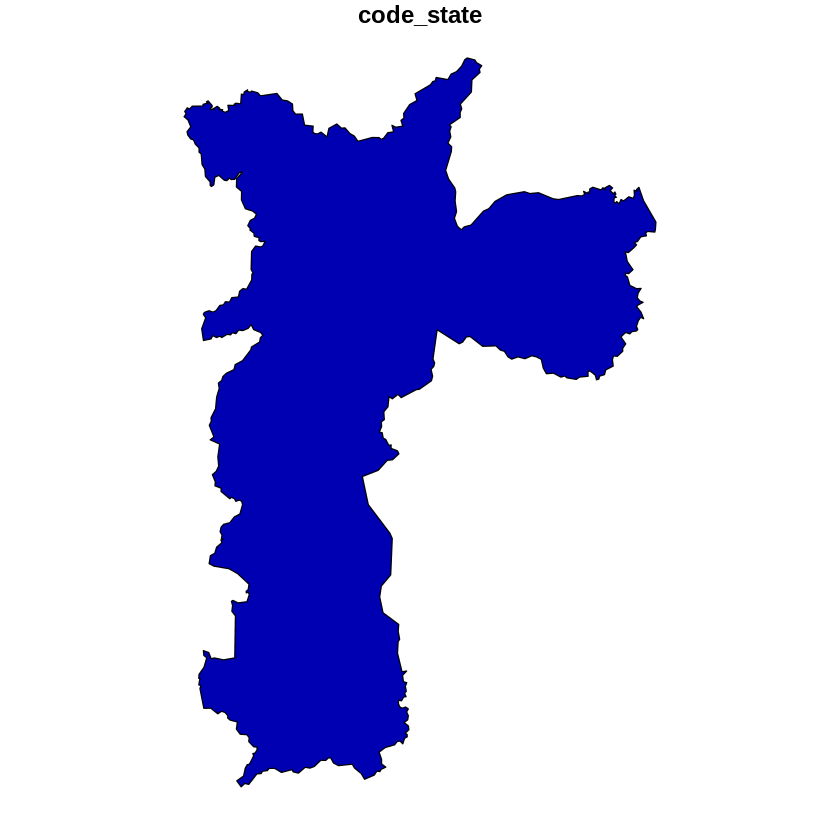

In [6]:
# 'Municípios' são os shapes de cada município
open_file <- '../../../indice-mobilidade_dados/01_municipios/2019/municipio_spo_2019.rds'
municipios <- read_rds(open_file)

dim(municipios)
head(municipios)
plot(municipios)

In [3]:
# 'Setores censitários' são os shapes dos setores cada município,
# com informações sobre limites administrativos
open_file <- '../../../indice-mobilidade_dados/02_setores_censitarios/2019/setores_spo_2019.rds'
set_censitarios <- read_rds(open_file)

# # Transforma projeção para WGS84
# set_censitarios <- set_censitarios %>% st_transform(31983) 

dim(set_censitarios)
head(set_censitarios)

[1] 18953    12

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<MULTIPOLYGON [°]>
1,355030804000079,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.51778 -...
2,355030804000080,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.51888 -...
3,355030804000081,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.52015 -...
4,355030804000082,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.5214 -2...
5,355030804000083,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.52371 -...
6,355030804000084,URBANO,3550308,São Paulo,NA,NA,35503080400,NA,355030804,Aricanduva,35,MULTIPOLYGON (((-46.5276 -2...


# Script 01.2-grade_censo

In [4]:
# O objeto 'grade' é o que possui grades estatísticas por estado - em especial, 
# quantidade de pessoas (população) com divisão por sexo (masc, fem), e domicílios

![grade](01_2-01_grade.png "grade")

In [5]:
# Após a junção com o shape do município no objeto 'grade_muni', a base ganha a 
# coluna de 'code_state' e o dataframe é filtrado para conter somente estas linhas

![grade_muni](01_2-02_grade_muni.png "grade_muni")

# Script 01.3-dados_setores_censitarios

In [6]:
# O objeto 'setores' corresponde a todas as informações selecionadas do 
# Censo 2010 (dados das bases: basico, dom_renda, dom02, pess03, pess13 
# e ent04). O objeto 'setores2' é a mesma base, somente para as cidades
# selecionadas no arquivo 'fun/setup.R'

# Ler arquivo de header de setores censitários (todos)
open_file <- '01_3-dados_setores_censitarios_header_setores.csv'
setores <- read_delim(open_file, delim = ';')
setores


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




Cod_UF,Cod_municipio,Cod_setor,DomRend_V003,Dom2_V002,Pess3_V002,Pess3_V003,Pess3_V004,Pess3_V005,Pess3_V006,Pess13_V023,Pess13_V024,Pess13_V025,Pess13_V026,Pess13_V027,Pess13_V028,Pess13_V029,Pess13_V030,Pess13_V031,Pess13_V032,Pess13_V033,Pess13_V034,Pess13_V035,Pess13_V036,Pess13_V037,Pess13_V038,Pess13_V039,Pess13_V040,Pess13_V041,Pess13_V042,Pess13_V043,Pess13_V044,Pess13_V045,Pess13_V046,Pess13_V047,Pess13_V048,Pess13_V049,Pess13_V050,Pess13_V051,Pess13_V052,Pess13_V053,Pess13_V054,Pess13_V055,Pess13_V056,Pess13_V057,Pess13_V058,Pess13_V059,Pess13_V060,Pess13_V061,Pess13_V062,Pess13_V063,Pess13_V064,Pess13_V065,Pess13_V066,Pess13_V067,Pess13_V068,Pess13_V069,Pess13_V070,Pess13_V071,Pess13_V072,Pess13_V073,Pess13_V074,Pess13_V075,Pess13_V076,Pess13_V077,Pess13_V078,Pess13_V079,Pess13_V080,Pess13_V081,Pess13_V082,Pess13_V083,Pess13_V084,Pess13_V085,Pess13_V086,Pess13_V087,Pess13_V088,Pess13_V089,Pess13_V090,Pess13_V091,Pess13_V092,Pess13_V093,Pess13_V094,Pess13_V095,Pess13_V096,Pess13_V097,Pess13_V098,Pess13_V099,Pess13_V100,Pess13_V101,Pess13_V102,Pess13_V103,Pess13_V104,Pess13_V105,Pess13_V106,Pess13_V107,Pess13_V108,Pess13_V109,Pess13_V110,Pess13_V111,Pess13_V112,Pess13_V113,Pess13_V114,Pess13_V115,Pess13_V116,Pess13_V117,Pess13_V118,Pess13_V119,Pess13_V120,Pess13_V121,Pess13_V122,Pess13_V123,Pess13_V124,Pess13_V125,Pess13_V126,Pess13_V127,Pess13_V128,Pess13_V129,Pess13_V130,Pess13_V131,Pess13_V132,Pess13_V133,Pess13_V134,Entorno04_V683,Entorno04_V684,Entorno04_V685,Entorno04_V686,Entorno04_V687,Entorno04_V688,Entorno04_V689,Entorno04_V690,Entorno04_V691,Entorno04_V692,Entorno04_V693,Entorno04_V694
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,1200013,120001305000001,601805,957,337,27,14,579,0,0,0,0,1,0,0,0,2,2,1,0,2,16,14,11,22,21,21,16,20,14,16,22,20,26,17,23,22,14,17,14,17,21,18,11,16,23,20,15,27,10,16,18,14,7,14,14,13,15,16,18,7,10,11,12,12,9,7,7,11,17,12,11,11,10,6,11,11,6,9,9,7,10,2,6,3,5,8,2,7,2,3,1,4,3,4,0,2,2,1,0,2,0,1,1,0,0,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,61,72,161,72,194,88,105,55,69,50,19,11
12,1200013,120001305000002,385033,1203,273,21,18,899,0,1,2,3,4,0,2,0,3,1,3,3,7,20,27,38,18,34,28,31,23,17,29,41,23,36,31,36,35,27,23,30,20,18,17,17,15,24,24,18,14,18,26,17,20,22,23,17,13,13,19,11,13,13,21,12,8,9,6,12,6,12,6,8,8,5,6,5,6,3,7,4,11,8,11,6,7,6,6,5,3,4,5,1,5,1,5,2,2,1,1,4,2,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,201,85,282,116,245,60,48,17,13,10,17
12,1200013,120001305000003,531794,1700,393,9,42,1260,1,4,2,4,3,1,3,2,5,5,5,3,4,40,34,46,38,43,36,45,43,47,47,39,31,35,27,51,21,37,34,26,24,28,33,27,38,27,49,33,35,29,32,35,30,23,20,28,24,23,23,16,21,12,22,18,17,23,16,11,14,23,8,11,6,7,13,12,9,12,3,7,7,7,6,4,4,13,6,4,7,2,3,4,1,1,4,7,7,1,3,1,5,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,128,300,107,434,116,360,52,114,3,26,23,35
12,1200013,120001305000004,58853,182,55,8,1,118,0,0,0,0,0,0,0,0,1,0,0,0,1,6,4,3,3,5,4,6,6,5,4,6,4,4,3,2,2,4,7,3,0,4,3,1,3,2,5,5,2,2,4,3,1,4,2,1,1,4,0,2,0,2,2,4,4,2,3,2,1,4,2,0,1,2,0,2,1,1,0,0,2,0,2,0,1,1,0,0,0,1,2,0,0,0,1,0,4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1200013,120001305000005,112979,305,82,22,10,191,0,1,1,0,0,0,0,1,1,0,1,0,0,5,6,6,5,5,3,10,2,5,5,6,4,7,3,5,5,9,9,5,3,3,5,4,8,1,5,6,6,10,8,3,0,1,8,4,5,8,3,

In [7]:
# O objeto 'setores3' soma as pessoas das colunas de faixa etária e renda, 
# sendo renda a partir da base 'entorno', que traz o rendimento nominal 
# mensal domiciliar per capita de moradores em domicílios particulares permanentes

# Ler arquivo de header de setores censitários (todos)
open_file <- '01_3-dados_setores_censitarios_header_setores3.csv'
setores3 <- read_delim(open_file, delim = ';')
setores3


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




Cod_UF,Cod_municipio,Cod_setor,DomRend_V003,Dom2_V002,Pess3_V002,Pess3_V003,Pess3_V004,Pess3_V005,Pess3_V006,Pess13_V023,Pess13_V024,Pess13_V025,Pess13_V026,Pess13_V027,Pess13_V028,Pess13_V029,Pess13_V030,Pess13_V031,Pess13_V032,Pess13_V033,Pess13_V034,Pess13_V035,Pess13_V036,Pess13_V037,Pess13_V038,Pess13_V039,Pess13_V040,Pess13_V041,Pess13_V042,Pess13_V043,Pess13_V044,Pess13_V045,Pess13_V046,Pess13_V047,Pess13_V048,Pess13_V049,Pess13_V050,Pess13_V051,Pess13_V052,Pess13_V053,Pess13_V054,Pess13_V055,Pess13_V056,Pess13_V057,Pess13_V058,Pess13_V059,Pess13_V060,Pess13_V061,Pess13_V062,Pess13_V063,Pess13_V064,Pess13_V065,Pess13_V066,Pess13_V067,Pess13_V068,Pess13_V069,Pess13_V070,Pess13_V071,Pess13_V072,Pess13_V073,Pess13_V074,Pess13_V075,Pess13_V076,Pess13_V077,Pess13_V078,Pess13_V079,Pess13_V080,Pess13_V081,Pess13_V082,Pess13_V083,Pess13_V084,Pess13_V085,Pess13_V086,Pess13_V087,Pess13_V088,Pess13_V089,Pess13_V090,Pess13_V091,Pess13_V092,Pess13_V093,Pess13_V094,Pess13_V095,Pess13_V096,Pess13_V097,Pess13_V098,Pess13_V099,Pess13_V100,Pess13_V101,Pess13_V102,Pess13_V103,Pess13_V104,Pess13_V105,Pess13_V106,Pess13_V107,Pess13_V108,Pess13_V109,Pess13_V110,Pess13_V111,Pess13_V112,Pess13_V113,Pess13_V114,Pess13_V115,Pess13_V116,Pess13_V117,Pess13_V118,Pess13_V119,Pess13_V120,Pess13_V121,Pess13_V122,Pess13_V123,Pess13_V124,Pess13_V125,Pess13_V126,Pess13_V127,Pess13_V128,Pess13_V129,Pess13_V130,Pess13_V131,Pess13_V132,Pess13_V133,Pess13_V134,Entorno04_V683,Entorno04_V684,Entorno04_V685,Entorno04_V686,Entorno04_V687,Entorno04_V688,Entorno04_V689,Entorno04_V690,Entorno04_V691,Entorno04_V692,Entorno04_V693,Entorno04_V694,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,moradores_SM_0_1Q,moradores_SM_1Q_1M,moradores_SM_1M_1,moradores_SM_1_2,moradores_SM_2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,2704302,270430205060001,2469444,796,534,4,9,253,0,2,0,1,0,3,1,2,2,0,2,2,1,11,7,7,8,8,7,9,8,7,9,10,10,10,8,11,14,11,10,7,15,24,17,18,8,13,13,10,17,20,13,11,19,12,8,12,6,11,8,18,13,7,11,9,18,12,21,15,6,11,11,9,7,9,12,10,11,12,4,5,12,5,5,5,9,8,4,2,6,6,6,3,6,4,2,4,2,7,7,2,1,2,2,4,0,1,1,1,2,1,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,12,5,43,15,408,274,19,20,57,78,46,89,191,275,64,39,0,17,58,682
27,2704302,270430205060002,2263972,935,621,51,6,257,0,0,0,0,0,3,1,1,0,2,0,0,2,6,7,8,8,8,8,6,14,16,9,16,9,7,9,9,11,14,8,11,20,15,11,15,18,23,22,23,26,18,22,21,13,11,13,19,12,16,11,17,18,14,9,11,13,16,16,17,17,9,18,14,12,15,6,8,7,13,9,15,12,10,6,5,6,5,6,4,6,7,9,10,6,10,2,4,3,2,6,1,6,0,3,2,0,2,1,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,8,0,28,0,77,0,817,0,5,0,46,94,42,90,267,324,72,5,8,28,77,817
27,2704302,270430205060003,1195245,490,318,18,1,153,0,0,0,0,0,0,1,0,1,1,1,0,0,5,2,4,3,9,3,5,3,10,8,6,7,4,6,4,6,2,9,12,7,10,12,10,12,5,5,8,7,6,5,7,7,6,6,14,12,9,6,7,5,5,9,5,5,7,7,5,9,11,3,8,7,6,9,8,4,8,9,5,3,7,3,7,4,3,7,3,2,3,3,2,7,3,1,3,1,4,1,2,1,0,3,2,3,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,1,0,0,4,5,17,8,44,22,239,128,12,11,27,52,21,63,110,177,40,23,9,25,66,367
27,2704302,270430205060004,2720963,881,569,21,2,289,0,2,2,2,0,2,1,2,1,2,0,2,0,16,8,11,12,11,5,14,11,9,8,6,5,7,5,16,8,7,12,13,10,8,24,19,13,14,18,18,15,27,29,26,17,14,25,19,10,14,8,16,9,9,16,11,14,

In [8]:
# O objeto 'setores4' é uma seleção das variáveis agrupadas em 'setores3' e das
# demais variáveis não agrupadas, renomeadas

# Ler arquivo de header de setores censitários (todos)
open_file <- '01_3-dados_setores_censitarios_header_setores4.csv'
setores4 <- read_delim(open_file, delim = ';')
setores4


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




cod_uf,cod_muni,cod_setor,renda_total,moradores_total,moradores_SM_0_1Q,moradores_SM_1Q_1M,moradores_SM_1M_1,moradores_SM_1_2,moradores_SM_2,cor_branca,cor_preta,cor_amarela,cor_parda,cor_indigena,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27,2704302,270430205060001,2469444,796,39,0,17,58,682,534,4,9,253,0,57,78,46,89,191,275,64
27,2704302,270430205060002,2263972,935,5,8,28,77,817,621,51,6,257,0,46,94,42,90,267,324,72
27,2704302,270430205060003,1195245,490,23,9,25,66,367,318,18,1,153,0,27,52,21,63,110,177,40
27,2704302,270430205060004,2720963,881,4,6,18,89,764,569,21,2,289,0,74,70,43,87,270,283,54
27,2704302,270430205060005,2531483,1044,9,4,29,118,884,818,9,0,217,0,99,91,46,77,362,313,56
27,2704302,270430205060006,1768475,767,25,22,51,154,515,535,25,2,205,0,56,70,40,88,220,240,53


In [9]:
# Os arquivos 'setores_agregados' são o resultado desta etapa
open_file <- '../../../indice-mobilidade_dados/05_setores_agregados/2019/setores_agregados_cur_2019.rds'
setores_ag <- read_rds(open_file)
head(setores_ag)

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,cod_uf,cod_muni,renda_total,moradores_total,renda_per_capita,moradores_SM_0_1Q,moradores_SM_1Q_1M,moradores_SM_1M_1,moradores_SM_1_2,moradores_SM_2,cor_branca,cor_preta,cor_amarela,cor_parda,cor_indigena,idade_0a5,idade_6a14,idade_15a18,idade_19a24,idade_25a39,idade_40a69,idade_70,geom
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,410690205020015,URBANO,4106902,Curitiba,Boqueirão,410690205056,41069020502,Administração Regional Do Boqueirão (R.2.Bq),410690205,Curitiba,41,41,4106902,823825,1121,734.9019,35,128,358,396,204,771,58,3,288,1,69,163,90,124,273,335,68,MULTIPOLYGON (((-49.23433 -...
2,410690205020016,URBANO,4106902,Curitiba,Boqueirão,410690205056,41069020502,Administração Regional Do Boqueirão (R.2.Bq),410690205,Curitiba,41,41,4106902,395623,512,772.7012,26,46,141,180,119,376,10,11,115,0,28,61,24,48,132,180,39,MULTIPOLYGON (((-49.23196 -...
3,410690205020017,URBANO,4106902,Curitiba,Boqueirão,410690205056,41069020502,Administração Regional Do Boqueirão (R.2.Bq),410690205,Curitiba,41,41,4106902,405047,578,700.7734,26,64,177,224,87,414,14,2,148,0,44,86,23,55,153,183,34,MULTIPOLYGON (((-49.23196 -...
4,410690205020018,URBANO,4106902,Curitiba,Boqueirão,410690205056,41069020502,Administração Regional Do Boqueirão (R.2.Bq),410690205,Curitiba,41,41,4106902,1177583,1007,1169.3972,39,82,289,358,239,683,28,12,283,1,71,144,64,106,265,288,70,MULTIPOLYGON (((-49.23132 -...
5,410690205020019,URBANO,4106902,Curitiba,Boqueirão,410690205056,41069020502,Administração Regional Do Boqueirão (R.2.Bq),410690205,Curitiba,41,41,4106902,558777,717,779.3264,19,66,181,284,167,575,34,2,103,3,50,75,50,77,187,236,42,MULTIPOLYGON (((-49.22392 -...
6,410690205020020,URBANO,4106902,Curitiba,Boqueirão,410690205056,41069020502,Administração Regional Do Boqueirão (R.2.Bq),410690205,Curitiba,41,41,4106902,610680,818,746.5526,24,103,240,272,179,603,25,4,179,7,63,123,58,84,215,245,31,MULTIPOLYGON (((-49.22653 -...


# Script 01.4-dados_educacao

In [15]:
# Ler arquivo de header de censo escolar - matrículas
open_file <- '../../../indice-mobilidade_dados/06_censo_escolar/2019/MATRICULA_CO.CSV'
matriculas <- read_delim(open_file, delim = '|', n_max = 6)
matriculas


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  ID_ALUNO = col_character(),
  IN_BAIXA_VISAO = col_logical(),
  IN_CEGUEIRA = col_logical(),
  IN_DEF_AUDITIVA = col_logical(),
  IN_DEF_FISICA = col_logical(),
  IN_DEF_INTELECTUAL = col_logical(),
  IN_SURDEZ = col_logical(),
  IN_SURDOCEGUEIRA = col_logical(),
  IN_DEF_MULTIPLA = col_logical(),
  IN_AUTISMO = col_logical(),
  IN_SUPERDOTACAO = col_logical(),
  IN_RECURSO_LEDOR = col_logical(),
  IN_RECURSO_TRANSCRICAO = col_logical(),
  IN_RECURSO_INTERPRETE = col_logical(),
  IN_RECURSO_LIBRAS = col_logical(),
  IN_RECURSO_LABIAL = col_logical(),
  IN_RECURSO_AMPLIADA_18 = col_logical(),
  IN_RECURSO_AMPLIADA_24 = col_logical(),
  IN_RECURSO_CD_AUDIO = col_logical(),
  IN_RECURSO_PROVA_PORTUGUES = col_logical()
  # ... with 26 more columns
)
ℹ Use `spec()` for the full column specifications.




NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,IN_RECURSO_LEDOR,IN_RECURSO_TRANSCRICAO,IN_RECURSO_INTERPRETE,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_AMPLIADA_18,IN_RECURSO_AMPLIADA_24,IN_RECURSO_CD_AUDIO,IN_RECURSO_PROVA_PORTUGUES,IN_RECURSO_VIDEO_LIBRAS,IN_RECURSO_BRAILLE,IN_RECURSO_NENHUM,IN_AEE_LIBRAS,IN_AEE_LINGUA_PORTUGUESA,IN_AEE_INFORMATICA_ACESSIVEL,IN_AEE_BRAILLE,IN_AEE_CAA,IN_AEE_SOROBAN,IN_AEE_VIDA_AUTONOMA,IN_AEE_OPTICOS_NAO_OPTICOS,IN_AEE_ENRIQ_CURRICULAR,IN_AEE_DESEN_COGNITIVO,IN_AEE_MOBILIDADE,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_BICICLETA,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_TR_ANIMAL,IN_TRANSP_VANS_KOMBI,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,TP_ETAPA_ENSINO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_MEDIACAO_DIDATICO_PEDAGO,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_UNIFICADA,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,F6D6452AF72DE310998696E26E2D8D18,2806432,2,2008,11,11,2,3,1,76,52,5208707,52,5208707,1,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,19,0,1,0,0,14656235,NA,1,255,0,0,0,0,5,0,1,0,52034410,5,5203,52010,52,5208707,520870705,4,1,4,1,1,0,0,0,0,0,0,1,1,0,0
2019,25D1459214A53D446CD3524FDF9503A9,224320410,10,2006,12,13,2,1,1,76,53,5300108,52,5221858,1,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,20,0,1,0,0,9069685,NA,1,270,0,0,0,0,5,0,1,0,52049108,5,5204,52012,52,5221858,522185805,4,1,1,0,NA,1,0,0,0,0,0,0,1,0,0
2019,0A278DB5DEFF0253AD3CBD7D567BA73F,295931671,3,2007,12,12,1,2,1,76,52,5208707,52,5220454,1,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,20,0,1,0,0,12215789,NA,1,255,0,0,0,0,5,0,1,0,52039471,5,5203,52010,52,5220454,522045405,3,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,0
2019,6D1D5A1A604A83AE54E4EDF3032307BE,333278288,9,2017,1,2,1,1,1,76,52,5210000,52,5210000,1,0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,1,0,0,14884177,NA,1,600,0,0,0,0,5,0,1,0,52210375,5,5203,52007,52,5210000,521000005,3,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,0
2019,6C5

In [17]:
# Arquivo censo escolar - matrículas com colunas selecionadas
matriculas %>% select(c("CO_ENTIDADE", "TP_DEPENDENCIA", "TP_ETAPA_ENSINO", 
                        "IN_REGULAR", "IN_PROFISSIONALIZANTE"))

select: dropped 98 variables (NU_ANO_CENSO, ID_ALUNO, ID_MATRICULA, NU_MES, NU_ANO, …)



CO_ENTIDADE,TP_DEPENDENCIA,TP_ETAPA_ENSINO,IN_REGULAR,IN_PROFISSIONALIZANTE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52034410,4,19,1,0
52049108,4,20,1,0
52039471,3,20,1,0
52210375,3,1,1,0
52090736,3,21,1,0
52033210,4,2,1,0


In [16]:
# Ler arquivo de header de censo escolar - escolas
open_file <- '../../../indice-mobilidade_dados/06_censo_escolar/2019/ESCOLAS.CSV'
escolas <- read_delim(open_file, delim = '|', n_max = 6)
escolas


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  NO_ENTIDADE = col_character(),
  CO_ORGAO_REGIONAL = col_character(),
  DT_ANO_LETIVO_INICIO = col_character(),
  DT_ANO_LETIVO_TERMINO = col_character(),
  TP_CATEGORIA_ESCOLA_PRIVADA = col_logical(),
  IN_CONVENIADA_PP = col_logical(),
  TP_CONVENIO_PODER_PUBLICO = col_logical(),
  IN_MANT_ESCOLA_PRIVADA_EMP = col_logical(),
  IN_MANT_ESCOLA_PRIVADA_ONG = col_logical(),
  IN_MANT_ESCOLA_PRIVADA_OSCIP = col_logical(),
  IN_MANT_ESCOLA_PRIV_ONG_OSCIP = col_logical(),
  IN_MANT_ESCOLA_PRIVADA_SIND = col_logical(),
  IN_MANT_ESCOLA_PRIVADA_SIST_S = col_logical(),
  IN_MANT_ESCOLA_PRIVADA_S_FINS = col_logical(),
  CO_ESCOLA_SEDE_VINCULADA = col_logical(),
  CO_IES_OFERTANTE = col_logical(),
  TP_OCUPACAO_GALPAO = col_logical(),
  TP_INDIGENA_LINGUA = col_logical(),
  CO_LINGUA_INDIGENA_1 = col_logical(),
  CO_LINGUA_INDIGENA_2 = col_l

NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_VINCULO_SECRETARIA_EDUCACAO,IN_VINCULO_SEGURANCA_PUBLICA,IN_VINCULO_SECRETARIA_SAUDE,IN_VINCULO_OUTRO_ORGAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_TRATAMENTO_LIXO_SEPARACAO,IN_TRATAMENTO_LIXO_REUTILIZA,IN_TRATAMENTO_LIXO_RECICLAGEM,IN_TRATAMENTO_LIXO_INEXISTENTE,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,⋯,QT_PROF_PEDAGOGIA,QT_PROF_SECRETARIO,QT_PROF_SEGURANCA,QT_PROF_MONITORES,IN_ALIMENTACAO,IN_SERIE_ANO,IN_PERIODOS_SEMESTRAIS,IN_FUNDAMENTAL_CICLOS,IN_GRUPOS_NAO_SERIADOS,IN_MODULOS,IN_FORMACAO_ALTERNANCIA,IN_MATERIAL_PED_MULTIMIDIA,IN_MATERIAL_PED_INFANTIL,IN_MATERIAL_PED_CIENTIFICO,IN_MATERIAL_PED_DIFUSAO,IN_MATERIAL_PED_MUSICAL,IN_MATERIAL_PED_JOGOS,IN_MATERIAL_PED_ARTISTICAS,IN_MATERIAL_PED_DESPORTIVA,IN_MATERIAL_PED_INDIGENA,IN_MATERIAL_PED_ETNICO,IN_MATERIAL_PED_CAMPO,IN_EDUCACAO_INDIGENA,TP_INDIGENA_LINGUA,CO_LINGUA_INDIGENA_1,CO_LINGUA_INDIGENA_2,CO_LINGUA_INDIGENA_3,IN_EXAME_SELECAO,IN_RESERVA_PPI,IN_RESERVA_RENDA,IN_RESERVA_PUBLICA,IN_RESERVA_PCD,IN_RESERVA_OUTROS,IN_RESERVA_NENHUMA,IN_REDES_SOCIAIS,IN_ESPACO_ATIVIDADE,IN_ESPACO_EQUIPAMENTO,IN_ORGAO_ASS_PAIS,IN_ORGAO_ASS_PAIS_MESTRES,IN_ORGAO_CONSELHO_ESCOLAR,IN_ORGAO_GREMIO_ESTUDANTIL,IN_ORGAO_OUTROS,IN_ORGAO_NENHUM,TP_PROPOSTA_PEDAGOGICA,TP_AEE,TP_ATIVIDADE_COMPLEMENTAR,IN_MEDIACAO_PRESENCIAL,IN_MEDIACAO_SEMIPRESENCIAL,IN_MEDIACAO_EAD,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,IN_COMUM_CRECHE,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_ESP_EXCLUSIVA_CRECHE,IN_ESP_EXCLUSIVA_PRE,IN_ESP_EXCLUSIVA_FUND_AI,IN_ESP_EXCLUSIVA_FUND_AF,IN_ESP_EXCLUSIVA_MEDIO_MEDIO,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl

In [18]:
names(escolas)

[1] "NU_ANO_CENSO"                   "CO_ENTIDADE"                   
  [3] "NO_ENTIDADE"                    "CO_ORGAO_REGIONAL"             
  [5] "TP_SITUACAO_FUNCIONAMENTO"      "DT_ANO_LETIVO_INICIO"          
  [7] "DT_ANO_LETIVO_TERMINO"          "CO_REGIAO"                     
  [9] "CO_MESORREGIAO"                 "CO_MICRORREGIAO"               
 [11] "CO_UF"                          "CO_MUNICIPIO"                  
 [13] "CO_DISTRITO"                    "TP_DEPENDENCIA"                
 [15] "TP_LOCALIZACAO"                 "TP_LOCALIZACAO_DIFERENCIADA"   
 [17] "IN_VINCULO_SECRETARIA_EDUCACAO" "IN_VINCULO_SEGURANCA_PUBLICA"  
 [19] "IN_VINCULO_SECRETARIA_SAUDE"    "IN_VINCULO_OUTRO_ORGAO"        
 [21] "TP_CATEGORIA_ESCOLA_PRIVADA"    "IN_CONVENIADA_PP"              
 [23] "TP_CONVENIO_PODER_PUBLICO"      "IN_MANT_ESCOLA_PRIVADA_EMP"    
 [25] "IN_MANT_ESCOLA_PRIVADA_ONG"     "IN_MANT_ESCOLA_PRIVADA_OSCIP"  
 [27] "IN_MANT_ESCOLA_PRIV_ONG_OSCIP"  "IN_MANT_ESCOLA_PRIVADA_SIND"   
 [29] "IN_MANT_ESCOLA_PRIVADA_SIST_S"  "IN_MANT_ESCOLA_PRIVADA_S_FINS" 
 [31] "TP_REGULAMENTACAO"              "TP_RESPONSAVEL_REGULAMENTACAO" 
 [33] "CO_ESCOLA_SEDE_VINCULADA"       "CO_IES_OFERTANTE"              
 [35] "IN_LOCAL_FUNC_PREDIO_ESCOLAR"   "TP_OCUPACAO_PREDIO_ESCOLAR"    
 [37] "IN_LOCAL_FUNC_SOCIOEDUCATIVO"   "IN_LOCAL_FUNC_UNID_PRISIONAL"  
 [39] "IN_LOCAL_FUNC_PRISIONAL_SOCIO"  "IN_LOCAL_FUNC_GALPAO"          
 [41] "TP_OCUPACAO_GALPAO"             "IN_LOCAL_FUNC_SALAS_OUTRA_ESC" 
 [43] "IN_LOCAL_FUNC_OUTROS"           "IN_PREDIO_COMPARTILHADO"       
 [45] "IN_AGUA_POTAVEL"                "IN_AGUA_REDE_PUBLICA"          
 [47] "IN_AGUA_POCO_ARTESIANO"         "IN_AGUA_CACIMBA"               
 [49] "IN_AGUA_FONTE_RIO"              "IN_AGUA_INEXISTENTE"           
 [51] "IN_ENERGIA_REDE_PUBLICA"        "IN_ENERGIA_GERADOR_FOSSIL"     
 [53] "IN_ENERGIA_RENOVAVEL"           "IN_ENERGIA_INEXISTENTE"        
 [55] "IN_ESGOTO_REDE_PUBLICA"         "IN_ESGOTO_FOSSA_SEPTICA"       
 [57] "IN_ESGOTO_FOSSA_COMUM"          "IN_ESGOTO_FOSSA"               
 [59] "IN_ESGOTO_INEXISTENTE"          "IN_LIXO_SERVICO_COLETA"        
 [61] "IN_LIXO_QUEIMA"                 "IN_LIXO_ENTERRA"               
 [63] "IN_LIXO_DESTINO_FINAL_PUBLICO"  "IN_LIXO_DESCARTA_OUTRA_AREA"   
 [65] "IN_TRATAMENTO_LIXO_SEPARACAO"   "IN_TRATAMENTO_LIXO_REUTILIZA"  
 [67] "IN_TRATAMENTO_LIXO_RECICLAGEM"  "IN_TRATAMENTO_LIXO_INEXISTENTE"
 [69] "IN_ALMOXARIFADO"                "IN_AREA_VERDE"                 
 [71] "IN_AUDITORIO"                   "IN_BANHEIRO"                   
 [73] "IN_BANHEIRO_EI"                 "IN_BANHEIRO_PNE"               
 [75] "IN_BANHEIRO_FUNCIONARIOS"       "IN_BANHEIRO_CHUVEIRO"          
 [77] "IN_BIBLIOTECA"                  "IN_BIBLIOTECA_SALA_LEITURA"    
 [79] "IN_COZINHA"                     "IN_DESPENSA"                   
 [81] "IN_DORMITORIO_ALUNO"            "IN_DORMITORIO_PROFESSOR"       
 [83] "IN_LABORATORIO_CIENCIAS"        "IN_LABORATORIO_INFORMATICA"    
 [85] "IN_PATIO_COBERTO"               "IN_PATIO_DESCOBERTO"           
 [87] "IN_PARQUE_INFANTIL"             "IN_PISCINA"                    
 [89] "IN_QUADRA_ESPORTES"             "IN_QUADRA_ESPORTES_COBERTA"    
 [91] "IN_QUADRA_ESPORTES_DESCOBERTA"  "IN_REFEITORIO"                 
 [93] "IN_SALA_ATELIE_ARTES"           "IN_SALA_MUSICA_CORAL"          
 [95] "IN_SALA_ESTUDIO_DANCA"          "IN_SALA_MULTIUSO"              
 [97] "IN_SALA_DIRETORIA"              "IN_SALA_LEITURA"               
 [99] "IN_SALA_PROFESSOR"              "IN_SALA_REPOUSO_ALUNO"         
[101] "IN_SECRETARIA"                  "IN_SALA_ATENDIMENTO_ESPECIAL"  
[103] "IN_TERREIRAO"                   "IN_VIVEIRO"                    
[105] "IN_DEPENDENCIAS_OUTRAS"         "IN_ACESSIBILIDADE_CORRIMAO"    
[107] "IN_ACESSIBILIDADE_ELEVADOR"     "IN_ACESSIBILIDADE_PISOS_TATEIS"
[109] "IN_ACESSIBILIDADE_VAO_LIVRE"    "IN_ACESSIBILIDADE_RAMPAS"      
[111] "IN_ACESSIBILIDADE_SINAL_SONORO" "IN

In [22]:
# Arquivo censo escolar - escolas com colunas selecionadas
escolas %>% select(c("CO_ENTIDADE",  "NO_ENTIDADE", "CO_MUNICIPIO",
                     "IN_LOCAL_FUNC_UNID_PRISIONAL", "IN_LOCAL_FUNC_PRISIONAL_SOCIO", # escolas prisionais
                     "IN_REGULAR", "IN_PROFISSIONALIZANTE", "IN_EJA",
                     "TP_DEPENDENCIA", "TP_SITUACAO_FUNCIONAMENTO"))

select: dropped 224 variables (NU_ANO_CENSO, CO_ORGAO_REGIONAL, DT_ANO_LETIVO_INICIO, DT_ANO_LETIVO_TERMINO, CO_REGIAO, …)



CO_ENTIDADE,NO_ENTIDADE,CO_MUNICIPIO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_REGULAR,IN_PROFISSIONALIZANTE,IN_EJA,TP_DEPENDENCIA,TP_SITUACAO_FUNCIONAMENTO
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43098282,ESC EST ENS MED ALBERTO PASQUALINI,4314100,0,0,1,0,0,2,1
43098460,ESC MUN ENS FUN PADRE JOSE DE ANCHIETA,4314100,0,0,1,0,0,3,1
43098479,ESC EST ENS MED PROFESSORA EULINA BRAGA,4314100,0,0,1,0,1,2,1
43098487,ESC MUN ENS FUN REPUBLICA DA COLOMBIA,4308854,0,0,1,0,0,3,1
43098495,ESC EST ENS FUN SALOMAO IOCHPE,4314100,0,0,1,0,0,2,1
43098509,EMEI ROQUE SOARES DO AMARAL,4314605,0,0,1,0,0,3,1


In [46]:
# O arquivo 'educacao_2019_filter' é o resultado desta etapa, puxado como 'censo_escolar' na
# etapa de georreferenciamento
open_file <- '../../../indice-mobilidade_dados/06_censo_escolar/2019/educacao_2019_filter.rds'
educacao <- read_rds(open_file)
head(educacao)

Warning message in FUN(X[[i]], ...):
“string de entrada 4 é inválida nesse locale”
Warning message in FUN(X[[i]], ...):
“string de entrada 4 é inválida nesse locale”
Warning message in FUN(X[[i]], ...):
“string de entrada 4 é inválida nesse locale”
Warning message in FUN(X[[i]], ...):
“string de entrada 4 é inválida nesse locale”
Warning message in FUN(X[[i]], ...):
“string de entrada 4 é inválida nesse locale”
Warning message in FUN(X[[i]], ...):
“string de entrada 4 é inválida nesse locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): string de entrada 4 é inválida nesse locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = 

co_entidade,ano,code_muni,no_entidade,mat_infantil,mat_fundamental,mat_medio
<int>,<dbl>,<int>,<chr>,<int>,<int>,<int>
50025716,2019,5002704,EM PROF IONE CATARINA GIANOTTI IGYDIO,169,973,0
50025910,2019,5002704,EMEI - ANTONIO RUSTIANO FERNANDES,188,0,0
50026062,2019,5002704,EMEI - MARIA CRISTINA OCARIZ DE BARROS,178,0,0
50032968,2019,5002704,ESC DE EDUC PROFISSIONAL DA FUNDACAO SOCIAL DO TRABALHO DE CG - FUNSAT,0,0,281
50005731,2019,5002704,EE ARACY EUDOCIAK,0,483,558
50005847,2019,5002704,EE PROF HILDA DE SOUZA FERREIRA,0,591,76


In [48]:
# Ler arquivo de header de endereço das escolas (INEP)
open_file <- '../../../indice-mobilidade_dados/06_censo_escolar/2019/INEP_ESCOLAS_CO.csv'
escolas_coords <- read_delim(open_file, delim = ';', n_max = 3)
escolas_coords


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `Restrição de Atendimento` = col_character(),
  Escola = col_character(),
  `Código INEP` = col_double(),
  UF = col_character(),
  Município = col_character(),
  Localização = col_character(),
  `Localidade Diferenciada` = col_character(),
  `Categoria Administrativa` = col_character(),
  Endereço = col_character(),
  Telefone = col_character(),
  `Dependência Administrativa` = col_character(),
  `Categoria Escola Privada` = col_character(),
  `Conveniada Poder Público` = col_character(),
  `Regulamentação pelo Conselho de Educação` = col_character(),
  `Porte da Escola` = col_character(),
  `Etapas e Modalidade de Ensino Oferecidas` = col_character(),
  `Outras Ofertas Educacionais` = col_logical(),
  Latitude = col_double(),
  Longitude = col_double()
)




Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Categoria Administrativa,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>
ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATENDIMENTO,ESCOLA DO SESI CORUMBA,50000039,MS,Corumbá,Urbana,A escola não está em área de localização diferenciada,Privada,"NOSSA SENHORA DA CANDELARIA, 1555 MARIA LEITE. 79310-050 Corumbá - MS.",NA,Privada,Particular,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Ensino Fundamental, Ensino Médio",NA,-19.01192,-57.62670
ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATENDIMENTO,EE DR GABRIEL VANDONI DE BARROS,50000047,MS,Corumbá,Urbana,A escola não está em área de localização diferenciada,Pública,"RUA NOSSA SENHORA DA CANDELARIA, SN MARIA LEITE. 79310-050 Corumbá - MS.",(67) 32316711,Estadual,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Ensino Fundamental, Ensino Médio, Educação Profissional, Educação de Jovens Adultos",NA,-19.00852,-57.62744
ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATENDIMENTO,COLEGIO ADVENTISTA DE CORUMBA,50000101,MS,Corumbá,Urbana,A escola não está em área de localização diferenciada,Privada,"RUA PORTO CARREIRO, 1956 AEROPORTO. 79332-090 Corumbá - MS.",(67) 32313553,Privada,Filantrópica,Não,Sim,Entre 201 e 500 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino Médio",NA,-19.00580,-57.65137


In [88]:
# O arquivo 'educacao_2019_filter' é o resultado desta etapa
open_file <- '../../../indice-mobilidade_dados/06_censo_escolar/2019/educacao_2019_filter_geocoded.rds'
escolas_coords_out <- read_rds(open_file)
head(escolas_coords_out, 3)

co_entidade,ano,code_muni,no_entidade,mat_infantil,mat_fundamental,mat_medio,endereco,uf,municipio,latitude,longitude
<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
50025716,2019,5002704,EM PROFª IONE CATARINA GIANOTTI IGYDIO,169,973,0,"RUA DOIS IRMAOS, 591 JARDIM NOROESTE. 79045-390 Campo Grande - MS.",MS,Campo Grande,-20.46061,-54.53048
50025910,2019,5002704,EMEI - ANTONIO RUSTIANO FERNANDES,188,0,0,"RUA DOS ANDES, 92 JARDIM JOQUEI CLUB. 79080-500 Campo Grande - MS.",MS,Campo Grande,-20.49605,-54.63861
50026062,2019,5002704,EMEI - MARIA CRISTINA OCARIZ DE BARROS,178,0,0,"RUA PIASSANGUABA, 1115 JARDIM TIJUCA. 79094-160 Campo Grande - MS.",MS,Campo Grande,-20.51794,-54.66883


In [89]:
escolas_coords_out %>% filter(is.na(latitude)) %>% dim()

filter: removed 11,235 rows (97%), 391 rows remaining



[1] 391  12

In [90]:
escolas_coords_out %>% filter(is.na(latitude)) %>% head()

filter: removed 11,235 rows (97%), 391 rows remaining



co_entidade,ano,code_muni,no_entidade,mat_infantil,mat_fundamental,mat_medio,endereco,uf,municipio,latitude,longitude
<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
13083732,2019,1302603,ESCOLA ESTADUAL PROFESSORA JACIMAR DA SILVA GAMA,0,59,224,"RUA PARAGUACU, S/N PETROPOLIS. 69065-010 Manaus - AM.",AM,Manaus,NA,NA
13106236,2019,1302603,CRECHE MUNICIPAL PROF ELIAS LIMA DE SOUZA,179,0,0,"RUA PIRATINI, S/N ZUMBI DOS PALMARES. 69084-050 Manaus - AM.",AM,Manaus,NA,NA
13100459,2019,1302603,CRECHE MUL MARIA FERREIRA BERNARDES,59,0,0,"RUA FAZENDINHA,S/N, S/N COMUNIDADE FAZENDINH. CIDADE NOVA. 69099-417 Manaus - AM.",AM,Manaus,NA,NA
13089170,2019,1302603,CMEI SAO FRANCISCO,140,0,0,"R. 15, 02 SAO JOSE - PENETRACA. SAO JOSE OPERARIO. 69086-160 Manaus - AM.",AM,Manaus,NA,NA
50029827,2019,5002704,EE POLO FRANCISCO CANDIDO DE REZENDE,0,0,216,"RUA GUIMARAES ROSA, 2056 DISTRITO DE ANHANDUI. 79125-000 Campo Grande - MS.",MS,Campo Grande,NA,NA
50009257,2019,5002704,EM AGRICOLA BARAO DO RIO BRANCO,18,131,0,"RUA GUIA LOPES, 340 ZONA RURAL. ROCHEDINHO. 79127-000 Campo Grande - MS.",MS,Campo Grande,NA,NA


In [ ]:
# Script 03.2-agrupamento_setor_para_grade

# Script 03.2-agrupamento_setor_para_grade

In [10]:
# O arquivo 'grade_renda_cor_nat_2019' é o resultado desta etapa
open_file <- '../../../indice-mobilidade_dados/XY_grade_municipio_com_renda_cor/2019/grade_renda_cor_nat_2019.rds'
ui_fim <- read_rds(open_file)
head(ui_fim, 3)

,id_grade,pop_total,pop_homens,pop_mulheres,area_grade,geom
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<POLYGON [°]>
1,1,2.251045,1.125523,1.125523,4110.618,POLYGON ((-35.28209 -5.8493...
2,1,16.111302,8.055651,8.055651,29420.736,POLYGON ((-35.28079 -5.8487...
3,1,2.129951,1.064976,1.064976,3889.489,POLYGON ((-35.28155 -5.8475...


In [17]:
# O arquivo 'grade_renda_cor_nat_2019' é o resultado desta etapa
open_file <- '../../../indice-mobilidade_dados/XY_grade_municipio_com_renda_cor/2019/grade_renda_cor_nat_2019.rds'
ui_fim <- read_rds(open_file)
head(ui_fim, 3)

ERROR: Error: No method asJSON S3 class: units
